In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup, Comment
from io import StringIO
from fake_useragent import UserAgent
import random
import time
import requests
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Output
import ipywidgets as widgets
import numpy as np


In [2]:

ua = UserAgent(browsers=['edge', 'chrome'])
ua.random

'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36 Edg/121.0.0.0 Unique/97.7.7239.70'

In [3]:
'''
In this code I will be web scraping the baseball-refence.com to get the data for each team
inturn I will turn this data into CV file so i can use python code on it to get the
cool graphs
'''
user_agents = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Edge/90.0.818.56',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:85.0) Gecko/20100101 Firefox/85.0',
    # Add more user agents for variety
]


for yearnum in range(2000, 2024):
    url = f'https://www.baseball-reference.com/leagues/majors/{yearnum}-standings.shtml#expanded_standings_overall'
    headers = {'User-Agent': random.choice(user_agents)}

    response = requests.get(url, headers=headers)

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Baseball Reference often places tables within HTML comments.
    # Extract all comments from the page.
    comments = soup.find_all(string=lambda text: isinstance(text, Comment))


    # Initialize a variable to hold the desired table's HTML
    table_html = None

    # Iterate through the comments to find the one containing the standings table
    for comment in comments:
        if 'expanded_standings_overall' in comment:
            table_html = comment
            break
    # Use pandas to read the HTML table from the extracted comment
    table_io = StringIO(table_html)

    # Use pandas to read the HTML table from the StringIO object
    tables = pd.read_html(table_io)

    truetable = tables[0]

    truetable = truetable.drop([30], axis=0)
    truetable['Year'] = yearnum
    if yearnum == 2000:
        df1 = truetable 
    else:
        df2 = truetable
        df1 = pd.concat([df1,df2], ignore_index=True) 
    time.sleep(random.uniform(1, 3))




In [4]:
df_2000 = df1[df1['Year'] == 2000]
df_2000

,Rk,Tm,W,L,W-L%,R,RA,Rdiff,SOS,SRS,...,Inter,Home,Road,ExInn,1Run,vRHP,vLHP,≥.500,<.500,Year
0,1.0,San Francisco Giants,97,65,0.599,5.7,4.6,1.1,-0.1,1.0,...,8-7,55-26,42-39,7-5,18-22,78-45,19-20,43-42,54-23,2000
1,2.0,Atlanta Braves,95,67,0.586,5.0,4.4,0.6,-0.2,0.4,...,11-7,51-30,44-37,3-5,18-18,74-53,21-14,42-33,53-34,2000
2,3.0,St. Louis Cardinals,95,67,0.586,5.5,4.8,0.7,-0.1,0.6,...,7-8,50-31,45-36,5-2,28-16,78-44,17-23,33-37,62-30,2000
3,4.0,Chicago White Sox,95,67,0.586,6.0,5.2,0.9,0.0,0.9,...,12-6,46-35,49-32,7-4,28-18,74-57,21-10,49-35,46-32,2000
4,5.0,New York Mets,94,68,0.580,5.0,4.6,0.4,-0.1,0.3,...,9-9,55-26,39-42,10-8,29-20,76-55,18-13,42-36,52-32,2000
5,6.0,Oakland Athletics,91,70,0.565,5.9,5.0,0.8,0.1,0.9,...,11-7,47-34,44-36,8-5,21-19,70-44,21-26,49-42,42-28,2000
6,7.0,Seattle Mariners,91,71,0.562,5.6,4.8,0.8,0.0,0.8,...,11-7,47-34,44-37,3-4,15-22,71-60,20-11,46-43,45-28,2000
7,8.0,Cleveland Indians,90,72,0.556,5.9,5.0,0.8,0.0,0.9,...,13-5,48-33,42-39,6-5,17-24,73-51,17-21,48-38,42-34,2000
8,9.0,New York Yankees,87,74,0.540,5.4,5.1,0.4,0.0,0.4,...,11-6,44-36,43-38,4-4,20-18,65-50,22-24,42-43,45-31,2000
9,10.0,Los Angeles Dodgers,86,76,0.531,4.9,4.5,0.4,0.0,0.4,...,6-9,44-37,42-39,9-5,25-21,67-51,19-25,40-46,46-30,2000


In [5]:
df1['Tm'].unique() 

array(['San Francisco Giants', 'Atlanta Braves', 'St. Louis Cardinals',
       'Chicago White Sox', 'New York Mets', 'Oakland Athletics',
       'Seattle Mariners', 'Cleveland Indians', 'New York Yankees',
       'Los Angeles Dodgers', 'Boston Red Sox', 'Cincinnati Reds',
       'Arizona Diamondbacks', 'Toronto Blue Jays', 'Anaheim Angels',
       'Colorado Rockies', 'Florida Marlins', 'Detroit Tigers',
       'Kansas City Royals', 'San Diego Padres', 'Baltimore Orioles',
       'Milwaukee Brewers', 'Houston Astros', 'Texas Rangers',
       'Tampa Bay Devil Rays', 'Minnesota Twins', 'Pittsburgh Pirates',
       'Montreal Expos', 'Philadelphia Phillies', 'Chicago Cubs',
       'Los Angeles Angels of Anaheim', 'Washington Nationals',
       'Tampa Bay Rays', 'Miami Marlins', 'Los Angeles Angels',
       'Cleveland Guardians'], dtype=object)

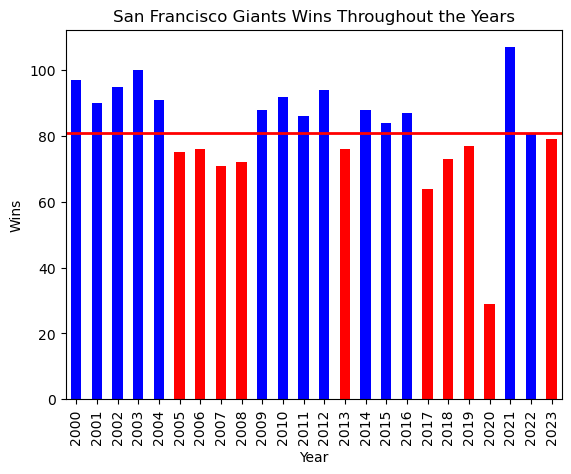

In [6]:
#df1.to_csv("/Users/jacobmantooth/truetable.csv", index=False) #change this, to your main path 

df_2000 = df1[df1['Tm'] == 'San Francisco Giants']
df_2000.set_index('Year', inplace=True)  # Set 'Year' as the index

colors = ['red' if w < 81 else 'blue' for w in df_2000['W']]


df_2000['W'].plot(kind='bar', color=colors)
plt.axhline(y=81, color='r', linestyle='-', linewidth=2)
plt.title("San Francisco Giants Wins Throughout the Years")
plt.xlabel("Year")
plt.ylabel("Wins")
plt.show()

Text(0, 0.5, 'Wins')

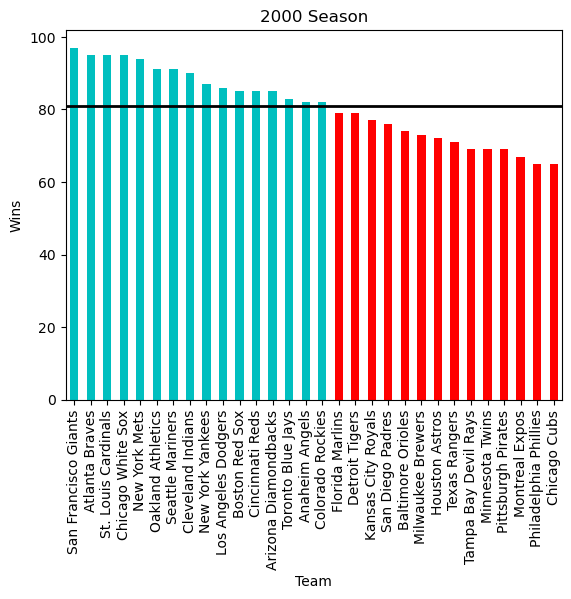

In [7]:

# Filter and set up the data
def time(df1,wantyear):
    return  df1[df1['Year'] == wantyear ]

df_2000 = time(df1,2000)
df_2000.set_index('Tm', inplace=True)

# Define colors based on whether the value is below or above the threshold
colors = ['red' if w < 81 else 'c' for w in df_2000['W']]

# Plot the bar chart with conditional colors
df_2000['W'].plot(kind='bar', color=colors)

# Add the horizontal red line
plt.axhline(y=81, color='k', linestyle='-', linewidth=2)

# Set title and labels
plt.title("2000 Season")
plt.xlabel("Team")
plt.ylabel("Wins")





In [8]:


def time(df1, wantyear):
    return df1[df1['Year'] == wantyear]

def plot(year = 2000):
    df_2000 = time(df1,year)
    df_2000.set_index('Tm', inplace=True)
    
    colors = ['red' if w < 81 else 'c' for w in df_2000['W']]
    df_2000['W'].plot(kind='bar', color=colors)
    plt.axhline(y=81, color='k', linestyle='-', linewidth=2)
    
    # Set title and labels
    plt.title(f"{int(year)} Season")
    plt.xlabel("Team")
    plt.ylabel("Wins")


interact(plot, year=FloatSlider(min=int(2000), max=int(2023), step=1, value=2000))

interactive(children=(FloatSlider(value=2000.0, description='year', max=2023.0, min=2000.0, step=1.0), Output(…

<function __main__.plot(year=2000)>

In [9]:


# Generate dropdown options from unique teams in 'Tm' column of df2
dropdownselection = list(df1['Tm'].unique())

# Create Dropdown widget
w = widgets.Dropdown(
    options=dropdownselection,
    value='Atlanta Braves',  # Default value to display
    description='Task:',
)
output = Output()
# Function to filter data by team
def teamse(df1, team):
    return df1[df1['Tm'] == team]

# Plotting function with team parameter
def plot(team='Atlanta Braves'):
    df_2000 = teamse(df1, team)
    df_2000.set_index('Year', inplace=True)
    
    colors = ['red' if w < 81 else 'c' for w in df_2000['W']]
    with output:
        output.clear_output()  # Clear previous output
        df_2000['W'].plot(kind='bar', color=colors)
        plt.axhline(y=81, color='r', linestyle='-', linewidth=2)
        plt.title(f"{team} Wins Throughout the Years")
        plt.xlabel("Year")
        plt.ylabel("Wins")
        plt.show()


# Function to handle dropdown changes and update the plot
def on_change(change):
    if change['name'] == 'value':  # Detect changes in dropdown selection
        plot(change['new'])

# Observe changes in the dropdown widget
def on_change(change):
    if change['name'] == 'value':  # Detect changes in dropdown selection
        plot(change['new'])

# Observe changes in the dropdown widget
w.observe(on_change, names='value')
display(w, output)

# Initial plot display with default team



Dropdown(description='Task:', index=1, options=('San Francisco Giants', 'Atlanta Braves', 'St. Louis Cardinals…

Output()

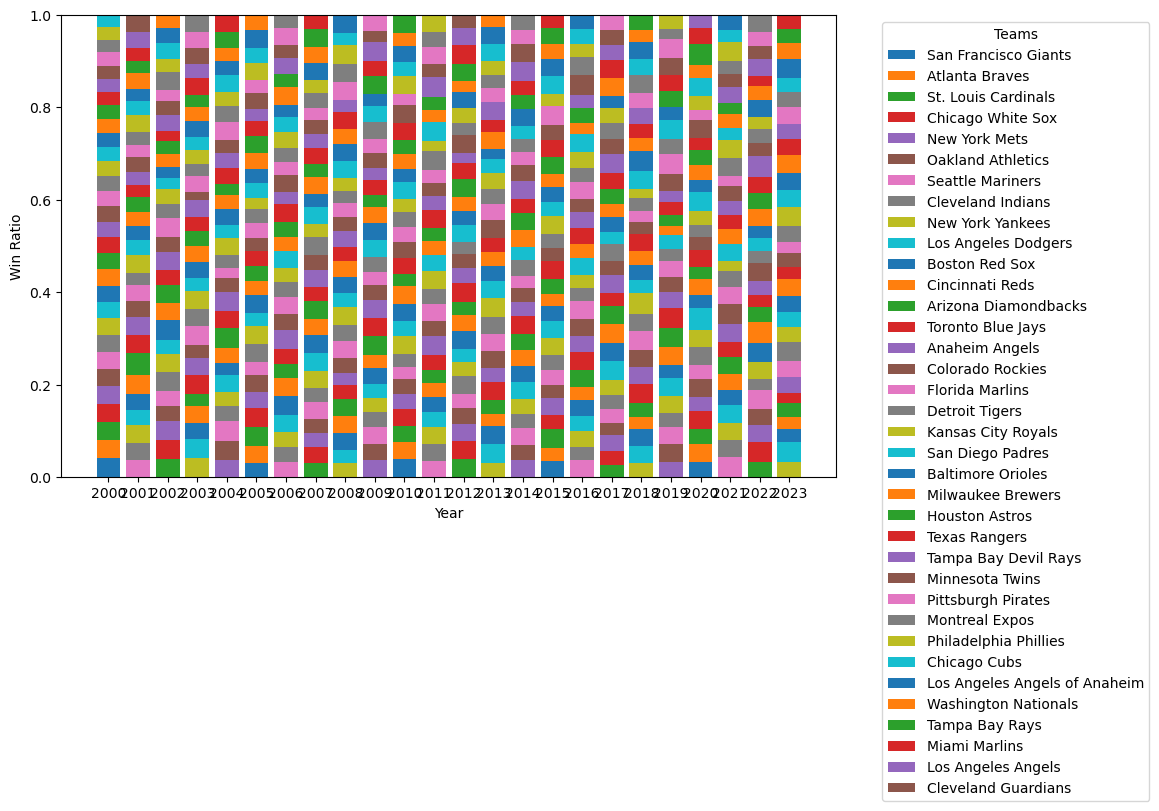

In [11]:


# Assuming df1 has 'Year', 'Tm', and 'W' columns
years = df1['Year'].unique()  # Unique years
teams = df1['Tm'].unique()    # Unique teams

# Prepare the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each year to create stacked bars
for i, year in enumerate(years):
    ratiokey = df1[df1['Year'] == year]
    total_wins = ratiokey['W'].sum()
    bottom = 0  # Initialize bottom for stacking in each year

    # Loop through each team for the given year and calculate the win ratio
    for team in teams:
        team_wins = ratiokey.loc[ratiokey['Tm'] == team, 'W'].sum() if team in ratiokey['Tm'].values else 0
        win_ratio = team_wins / total_wins if total_wins > 0 else 0
        ax.bar(year, win_ratio, bottom=bottom, label=team if i == 0 else "")  # Add label only once
        bottom += win_ratio  # Update bottom for the next segment

# Configure the chart
ax.set_xlabel('Year')
ax.set_ylabel('Win Ratio')
ax.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(years)  # Set x-ticks to be each year
plt.show()

